<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 5500000)

In [7]:
df['gasto_familiar'].describe()

count    9.527193e+06
mean     7.776832e+05
std      1.511546e+06
min     -9.300000e+06
25%      1.932850e+05
50%      4.512490e+05
75%      8.795990e+05
max      7.190166e+08
Name: gasto_familiar, dtype: float64

In [8]:
df_std = df[df['gasto_familiar'] < 900000]
df_std = df_std[df_std['gasto_familiar'] > 100000]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,232526.000000
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,265900.000000
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,243052.000000
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,276014.000000
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,418866.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527186,3.0,5490549.0,0.0,OTROS,UNIVERSITARIO,Independiente,8,CASADO,B,M,...,4,202011,1,22000000.0,11,41595000.0,0.0,PUERRES,43,793750.265240
9527187,2.0,5002000.0,1922668.0,TECNOLOGIA EN ADMINISTRACION,TECNOLOGO,Empleado,6,SOLTERO,G,F,...,5,202011,0,8400000.0,11,0.0,0.0,NARINO,55,760841.406402
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,743171.378775
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,850216.450920


## One-Hot Encoding

In [9]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [10]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
0,1.0,1173431.0,1255032.0,6,1,1,5,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1173431.0,1255032.0,6,1,1,5,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1172612.0,1255032.0,6,1,1,5,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1172612.0,1282673.0,6,1,1,5,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1355032.0,1255032.0,6,1,1,5,2,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527186,3.0,5490549.0,0.0,8,1,1,7,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527187,2.0,5002000.0,1922668.0,6,1,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    5887405
dtype: int64

## Best Variables

In [12]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:7]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar']

In [13]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
                     'gasto_familiar']

In [14]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,gasto_familiar
0,1.0,1173431.0,1255032.0,6,1,1,5,232526.000000
1,1.0,1173431.0,1255032.0,6,1,1,5,265900.000000
2,1.0,1172612.0,1255032.0,6,1,1,5,243052.000000
3,1.0,1172612.0,1282673.0,6,1,1,5,276014.000000
4,1.0,1355032.0,1255032.0,6,1,1,5,418866.000000
...,...,...,...,...,...,...,...,...
9527186,3.0,5490549.0,0.0,8,1,1,7,793750.265240
9527187,2.0,5002000.0,1922668.0,6,1,1,2,760841.406402
9527188,2.0,3876343.0,2281362.0,6,1,1,8,743171.378775
9527189,3.0,26913722.0,14956096.0,6,1,1,5,850216.450920


## Normalization

In [15]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,5887405.0,0.28,0.13,0.0,0.20,0.20,0.40,1.0
1,5887405.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,5887405.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
3,5887405.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,5887405.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,5887405.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,5887405.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,5887405.0,0.41,0.28,0.0,0.16,0.36,0.63,1.0


In [16]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [17]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 7)
(281666,)
(5605739,)


## Train_Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6
2529244,0.4,0.002220,0.006578,0.555556,0.0,0.0,0.428571
1006266,0.2,0.000671,0.004278,0.777778,0.0,0.0,1.000000
4611411,0.2,0.000551,0.003034,0.555556,0.0,0.0,1.000000
2582002,0.2,0.000441,0.000000,0.555556,0.0,0.0,0.857143
684600,0.2,0.000645,0.000000,0.555556,0.0,0.0,0.428571
...,...,...,...,...,...,...,...
1341142,0.2,0.000210,0.000000,0.555556,0.0,0.0,0.142857
3024689,0.4,0.003213,0.000000,0.777778,0.0,0.0,0.000000
4645311,0.6,0.001686,0.000000,0.111111,0.0,0.0,1.000000
4048851,0.2,0.000689,0.000000,0.555556,0.0,0.0,1.000000


In [19]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [20]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(100, input_dim=7, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 31,201
Trainable params: 31,201
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [23]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [24]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

52554/52554 [==============================] - 41s 781us/step - loss: 0.0727 - mean_absolute_percentage_error: 964.2813
loss :  0.07273891568183899
mean_absolute_percentage_error :  964.2813110351562


## Submission

In [25]:
y_hat = model.predict(x_val)
y_hat

array([[0.34016293],
       [0.33352932],
       [0.31608093],
       ...,
       [0.41991684],
       [0.55835444],
       [0.458171  ]], dtype=float32)

In [26]:
y_val

array([0.3569026 , 0.59405406, 0.71537779, ..., 0.80396472, 0.93777118,
       0.85666174])

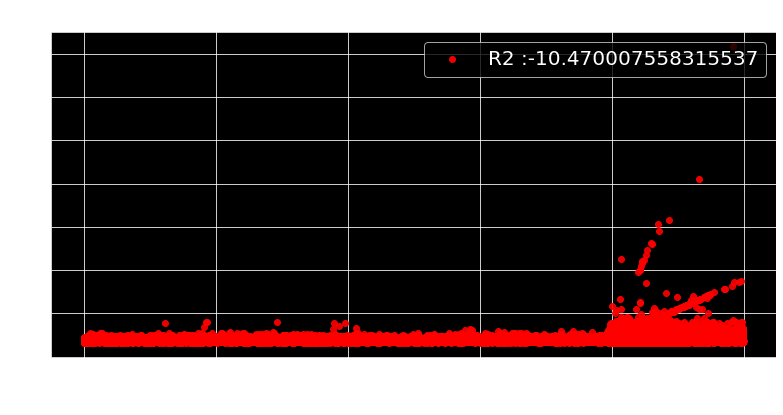

In [27]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [28]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.340163
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.333529
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.316081
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.340238
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.323208
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.456583
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.394422
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.419917
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.558354


In [29]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         372130.282004
1         366823.399141
2         352864.695280
3         372190.053488
4         358566.685057
              ...      
281661    465265.889084
281662    415537.611697
281663    435933.349155
281664    546683.328889
281665    466536.658970
Name: 7, Length: 281666, dtype: float64

In [30]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,372130.282004
1,12598#201902,366823.399141
2,23697#201902,352864.695280
3,23768#201902,372190.053488
4,7174#201902,358566.685057
...,...,...
281661,8596193#202011,465265.889084
281662,8616083#202011,415537.611697
281663,8670207#202011,435933.349155
281664,8677655#202011,546683.328889


In [31]:
n = 140
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN140.csv'

In [32]:
np.mean(sub['gasto_familiar'])

421040.45196472324

In [33]:
sub.to_csv(sub_name, index=False)

# Test 1

In [34]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

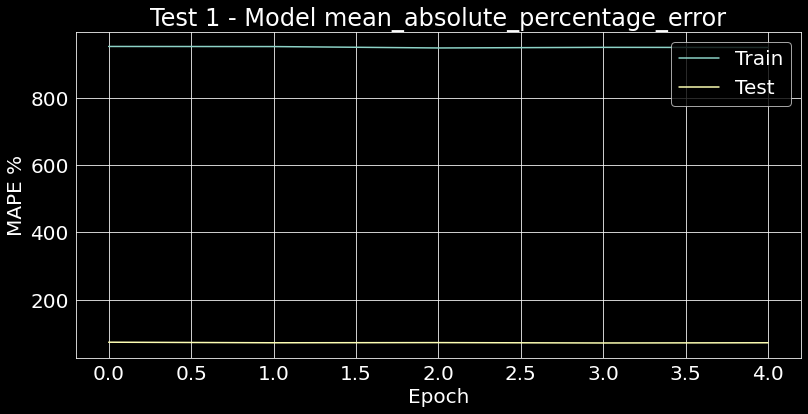

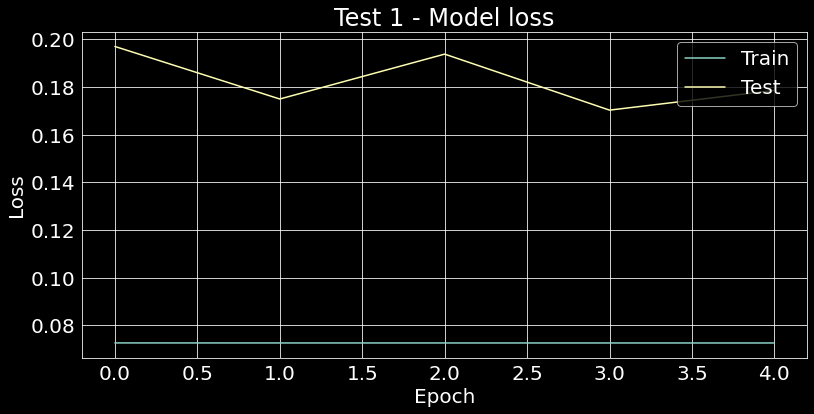

In [35]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [36]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

52554/52554 [==============================] - 41s 786us/step - loss: 0.0725 - mean_absolute_percentage_error: 994.3196
loss :  0.07249797880649567
mean_absolute_percentage_error :  994.3196411132812


# Submission

In [37]:
y_hat = model.predict(x_val)
y_hat

array([[0.36265916],
       [0.35890546],
       [0.34602585],
       ...,
       [0.40811187],
       [0.5142266 ],
       [0.44724613]], dtype=float32)

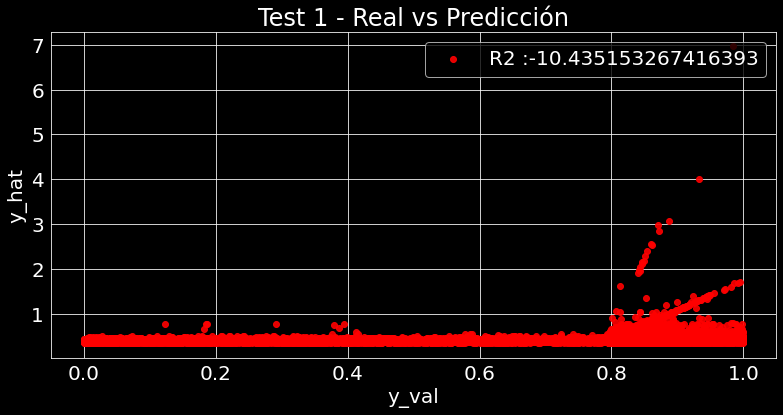

In [38]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [39]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.362659
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.358905
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.346026
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.356066
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.350258
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.435023
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.400052
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.408112
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.514227


In [40]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         390127.244608
1         387124.293774
2         376820.614975
3         384852.977377
4         380206.203442
              ...      
281661    448017.941616
281662    420041.739924
281663    426489.383138
281664    511381.103042
281665    457796.766227
Name: 7, Length: 281666, dtype: float64

In [41]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,390127.244608
1,12598#201902,387124.293774
2,23697#201902,376820.614975
3,23768#201902,384852.977377
4,7174#201902,380206.203442
...,...,...
281661,8596193#202011,448017.941616
281662,8616083#202011,420041.739924
281663,8670207#202011,426489.383138
281664,8677655#202011,511381.103042


In [42]:
n = 141
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN141.csv'

In [43]:
np.mean(sub['gasto_familiar'])

420559.2507440089

In [44]:
sub.to_csv(sub_name, index=False)

# Test 2

In [45]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


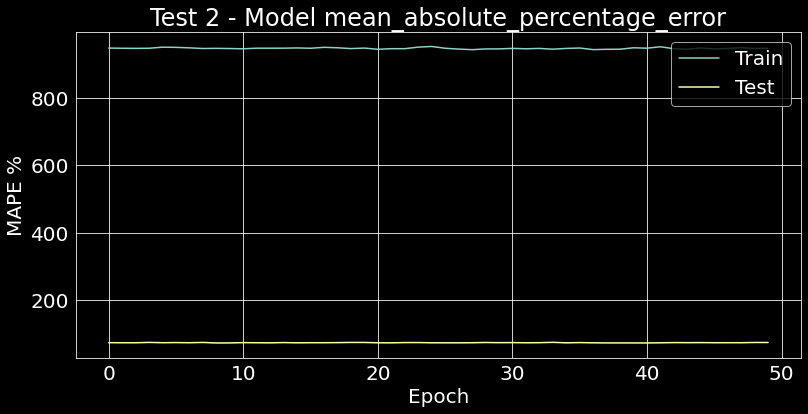

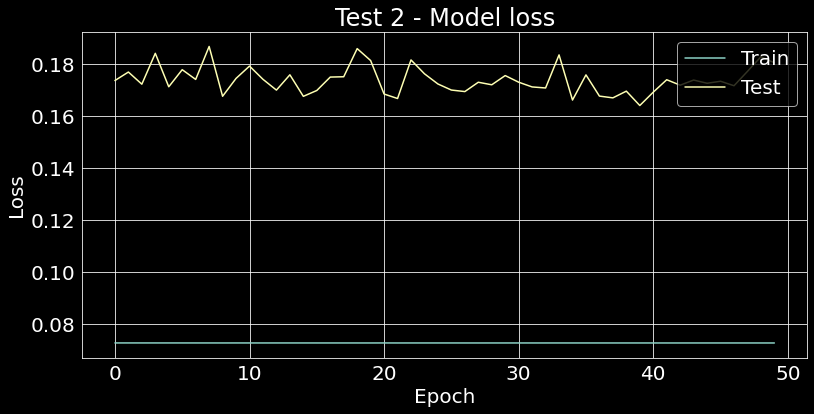

In [46]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [47]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

52554/52554 [==============================] - 40s 766us/step - loss: 0.0725 - mean_absolute_percentage_error: 987.0672
loss :  0.07252278923988342
mean_absolute_percentage_error :  987.0671997070312


# Submission

In [48]:
y_hat = model.predict(x_val)
y_hat

array([[0.35932973],
       [0.3552217 ],
       [0.34575972],
       ...,
       [0.4058789 ],
       [0.5174863 ],
       [0.44541118]], dtype=float32)

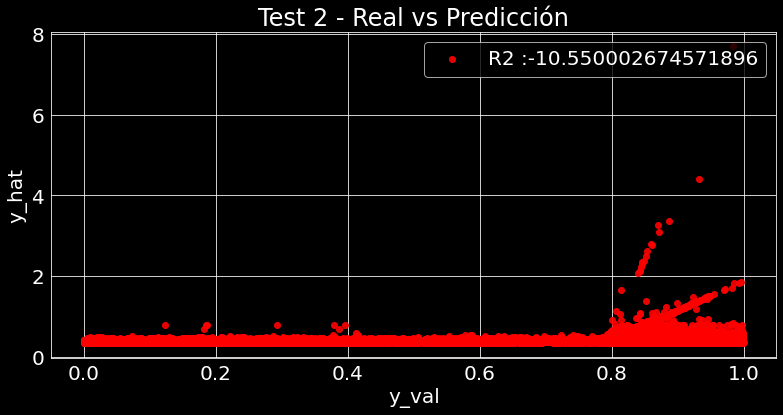

In [49]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [50]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.359330
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.355222
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.345760
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.356597
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.350400
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.431562
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.397409
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.405879
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.517486


In [51]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         387463.706159
1         384177.275889
2         376607.707375
3         385277.409751
4         380319.571375
              ...      
281661    445249.308352
281662    417927.207444
281663    424703.009696
281664    513988.827752
281665    456328.800511
Name: 7, Length: 281666, dtype: float64

In [52]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,387463.706159
1,12598#201902,384177.275889
2,23697#201902,376607.707375
3,23768#201902,385277.409751
4,7174#201902,380319.571375
...,...,...
281661,8596193#202011,445249.308352
281662,8616083#202011,417927.207444
281663,8670207#202011,424703.009696
281664,8677655#202011,513988.827752


In [53]:
n = 142
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN142.csv'

In [54]:
np.mean(sub['gasto_familiar'])

418977.73750510317

In [55]:
sub.to_csv(sub_name, index=False)

# Test 3

In [56]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


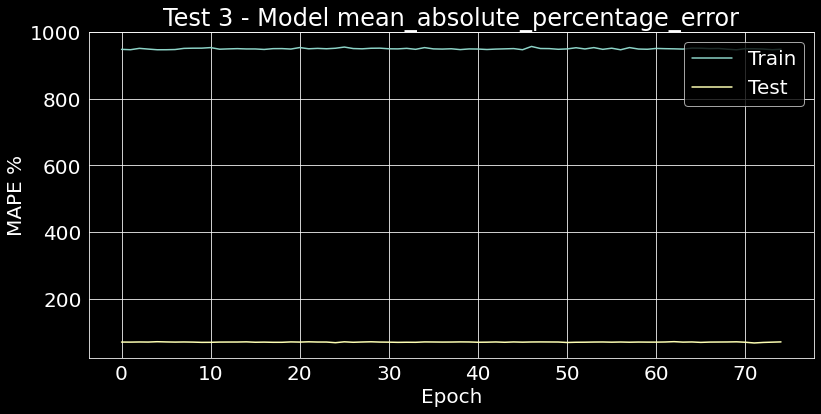

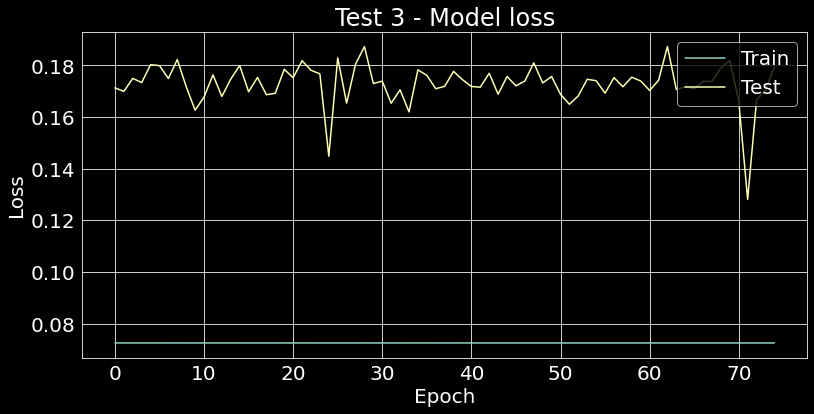

In [57]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [58]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

52554/52554 [==============================] - 40s 764us/step - loss: 0.0725 - mean_absolute_percentage_error: 989.0709
loss :  0.07250968366861343
mean_absolute_percentage_error :  989.0708618164062


## Submission

In [59]:
y_hat = model.predict(x_val)
y_hat

array([[0.3600373],
       [0.355849 ],
       [0.3460011],
       ...,
       [0.4067117],
       [0.5200941],
       [0.4468571]], dtype=float32)

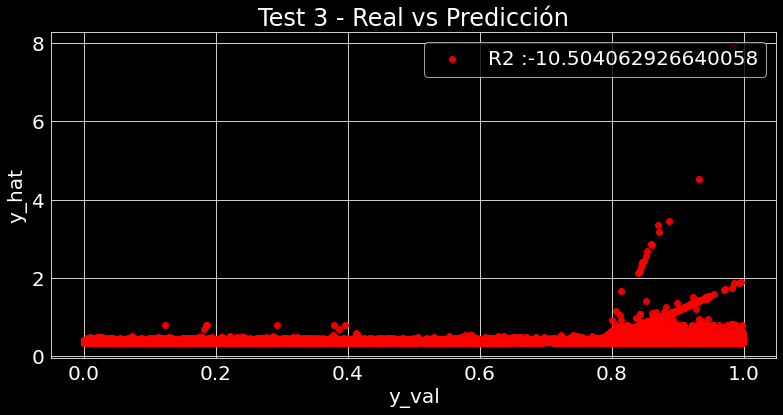

In [60]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [61]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.360037
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.355849
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.346001
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.356958
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.350737
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.432450
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.398249
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.406712
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.520094


In [62]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         388029.759041
1         384679.122706
2         376800.802408
3         385566.229758
4         380589.174862
              ...      
281661    445959.675871
281662    418599.070397
281663    425369.245975
281664    516075.083813
281665    457485.534893
Name: 7, Length: 281666, dtype: float64

In [63]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,388029.759041
1,12598#201902,384679.122706
2,23697#201902,376800.802408
3,23768#201902,385566.229758
4,7174#201902,380589.174862
...,...,...
281661,8596193#202011,445959.675871
281662,8616083#202011,418599.070397
281663,8670207#202011,425369.245975
281664,8677655#202011,516075.083813


In [64]:
n = 143
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN143.csv'

In [65]:
np.mean(sub['gasto_familiar'])

419754.362769699

In [66]:
sub.to_csv(sub_name, index=False)

# Test 4

In [67]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


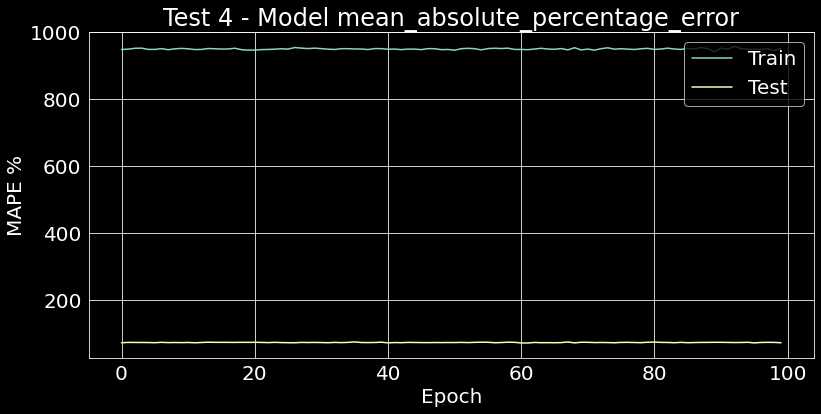

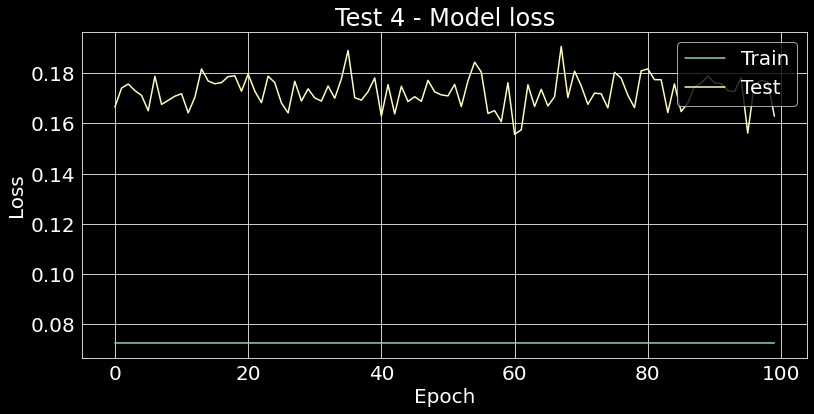

In [68]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [69]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

52554/52554 [==============================] - 40s 762us/step - loss: 0.0726 - mean_absolute_percentage_error: 1036.3013
loss :  0.07259947061538696
mean_absolute_percentage_error :  1036.30126953125


## Submission

In [70]:
y_hat = model.predict(x_val)
y_hat

array([[0.3748904 ],
       [0.36988354],
       [0.3578768 ],
       ...,
       [0.43044525],
       [0.56512374],
       [0.4774934 ]], dtype=float32)

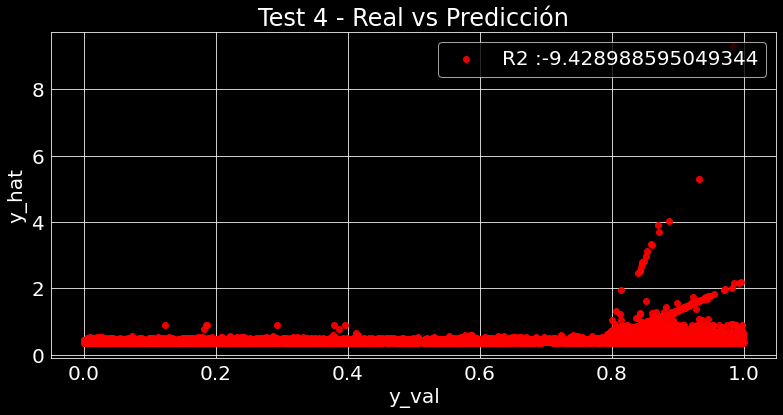

In [71]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [72]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.374890
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.369884
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.357877
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.371113
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.363530
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.460702
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.420071
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.430445
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.565124


In [73]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         399912.220412
1         395906.744195
2         386301.368945
3         396890.649104
4         390824.141489
              ...      
281661    468561.617670
281662    436056.778343
281663    444356.073947
281664    552098.763633
281665    481994.561353
Name: 7, Length: 281666, dtype: float64

In [74]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,399912.220412
1,12598#201902,395906.744195
2,23697#201902,386301.368945
3,23768#201902,396890.649104
4,7174#201902,390824.141489
...,...,...
281661,8596193#202011,468561.617670
281662,8616083#202011,436056.778343
281663,8670207#202011,444356.073947
281664,8677655#202011,552098.763633


In [75]:
n = 144
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN144.csv'

In [76]:
np.mean(sub['gasto_familiar'])

437597.8315029913

In [77]:
sub.to_csv(sub_name, index=False)

# Test 5

In [78]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



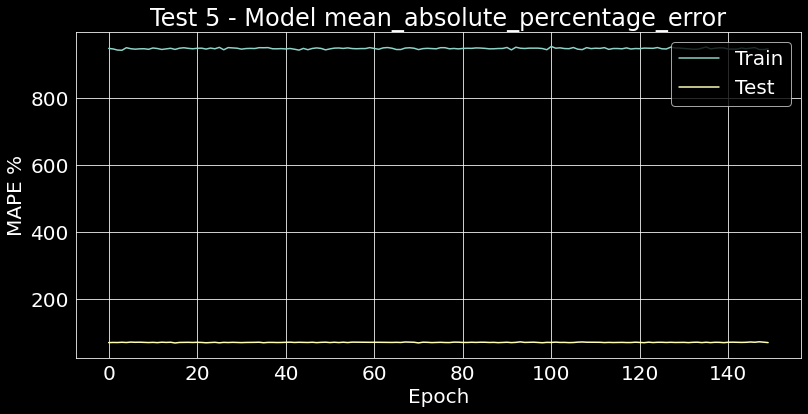

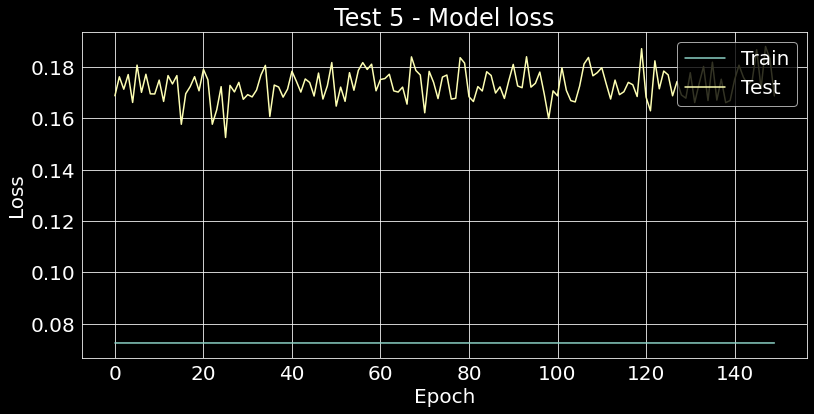

In [79]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [80]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

52554/52554 [==============================] - 40s 765us/step - loss: 0.0725 - mean_absolute_percentage_error: 1011.0659
loss :  0.07248511165380478
mean_absolute_percentage_error :  1011.0658569335938


# Submission

In [81]:
y_hat = model.predict(x_val)
y_hat

array([[0.36417234],
       [0.3587782 ],
       [0.34543803],
       ...,
       [0.42386955],
       [0.5712129 ],
       [0.47648245]], dtype=float32)

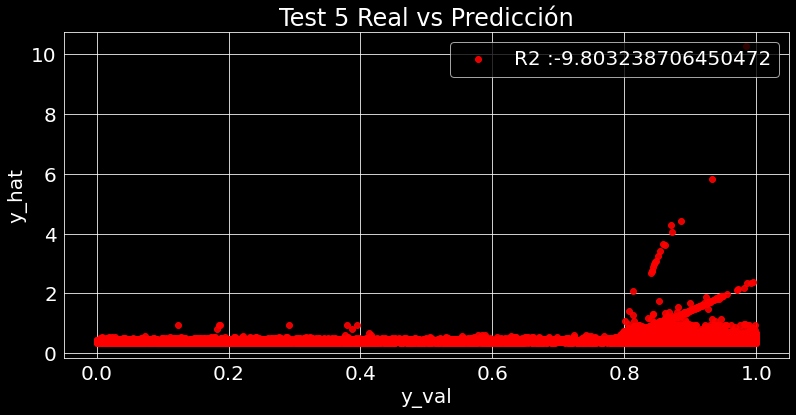

In [82]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'red',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [83]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.000735,0.000000,0.555556,0.0,0.0,0.285714,0.364172
1,0.2,0.000386,0.000000,0.555556,0.0,0.0,0.142857,0.358778
2,0.2,0.000428,0.000000,0.000000,0.0,0.0,0.000000,0.345438
3,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.714286,0.359313
4,0.2,0.000850,0.000000,0.000000,0.0,0.0,0.142857,0.351550
...,...,...,...,...,...,...,...,...
281661,0.6,0.001392,0.000000,0.777778,0.0,0.0,0.857143,0.457191
281662,0.4,0.001268,0.003300,0.555556,0.0,0.0,0.142857,0.413386
281663,0.4,0.000983,0.003916,0.555556,0.0,0.0,1.000000,0.423870
281664,0.6,0.006825,0.025670,0.555556,0.0,0.0,0.571429,0.571213


In [84]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         391337.790015
1         387022.489132
2         376350.358591
3         387450.664674
4         381239.842422
              ...      
281661    465752.286391
281662    430708.863679
281663    439095.515773
281664    556970.079984
281665    481185.798575
Name: 7, Length: 281666, dtype: float64

In [85]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,391337.790015
1,12598#201902,387022.489132
2,23697#201902,376350.358591
3,23768#201902,387450.664674
4,7174#201902,381239.842422
...,...,...
281661,8596193#202011,465752.286391
281662,8616083#202011,430708.863679
281663,8670207#202011,439095.515773
281664,8677655#202011,556970.079984


In [86]:
n = 145
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN145.csv'

In [87]:
np.mean(sub['gasto_familiar'])

432112.9778727244

In [88]:
sub.to_csv(sub_name, index=False)